# Predicting how users with different lifestyle category interest will interact with off-plan multi-lingual Real Estate Video Ads in the GCC* on Snapchat


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv("set2.csv")
df.head()

,Start Time,Lifestyle Category,Campaign Name,Paid Impressions,Amount Spent,Paid eCPM,Swipe Ups,eCPSU,Swipe Up Rate
0,2021-04-01 00:00:00 GST,Women's Lifestyle,Sobha - 3ayar - UAE,14158,55.67,3.93,56,0.99,0.0040
1,2021-04-01 00:00:00 GST,Automotive Shoppers,Sobha - 3ayar - UAE,16091,56.39,3.50,64,0.88,0.0040
2,2021-04-01 00:00:00 GST,Social Drinkers,Sobha - 3ayar - UAE,97,0.25,2.55,1,0.25,0.0103
3,2021-04-01 00:00:00 GST,Beer Drinkers,Sobha - 3ayar - UAE,39,0.15,3.89,0,0.00,0.0000
4,2021-04-01 00:00:00 GST,Wine Enthusiasts,Sobha - 3ayar - UAE,17,0.05,2.85,0,0.00,0.0000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31578 entries, 0 to 31577
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Time          31578 non-null  object 
 1   Lifestyle Category  31578 non-null  object 
 2   Campaign Name       31578 non-null  object 
 3   Paid Impressions    31578 non-null  int64  
 4   Amount Spent        31578 non-null  float64
 5   Paid eCPM           31578 non-null  float64
 6   Swipe Ups           31578 non-null  int64  
 7   eCPSU               31578 non-null  float64
 8   Swipe Up Rate       31578 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 2.2+ MB


###### Dropping Values wherever Paid Impressions Amount Spent Paid eCPM are null

In [4]:
df.drop(df[df['Paid Impressions'].isnull().values].index, axis=0, inplace=True)
df.drop(df[df['Amount Spent'].isnull().values].index, axis=0, inplace=True)
df.drop(df[df['Paid eCPM'].isnull().values].index, axis=0, inplace=True)

# Data Cleansing, Pre Processing And Exploratory 

### 1) Date column

In [5]:
## Function for transforming Start Time column
def datetime_split(start_time):
    return start_time.split(" ")[0]

## Transforming Date Time Column
df['Date'] = pd.to_datetime(df['Start Time'].apply(datetime_split))

In [6]:
#### Exploratory Swipe ups Vs Date

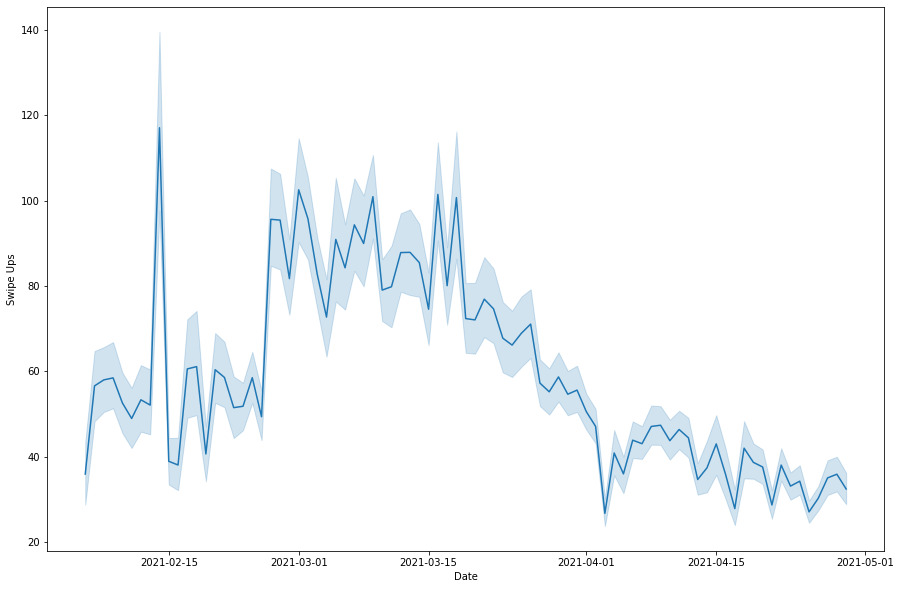

In [7]:
plt.figure(figsize=[15, 10])
sns.lineplot(x=df['Date'], y=df['Swipe Ups'])
plt.show()

### 2) Lifestyle Category

In [8]:
## Getting Unique values for Lifestyle column
df['Lifestyle Category'].unique()

array(["Women's Lifestyle", 'Automotive Shoppers', 'Social Drinkers',
       'Beer Drinkers', 'Wine Enthusiasts', 'Liquor & Spirits Drinkers',
       'Fun Trivia & Quiz Fanatics', 'Meme Watchers',
       'Chat Fiction Enthusiasts', 'High Schoolers',
       'Advocates & Activists', 'Wellness & Healthy Lifestyle',
       'New Phone Seekers', 'Latin Music Fans', 'Esports Enthusiasts',
       'Soul & R&b Fans', 'World Music Fans', 'Cricket Fans',
       'Crime & Mystery Genre Fans', 'Indie & Foreign Film Fans',
       'Comics & Animation Fans', 'Talent & Competition Show Fans',
       'Do-it-yourselfers', 'Talk Show Fans', 'Fashion & Style Gurus',
       'Film & Tv Fans', 'Action & Thriller Genre Fans', 'Comedy Fans',
       'Cordcutters', 'Drama Genre Fans', 'Family Genre Fans',
       'Horror Genre Fans', 'Adventure Seekers', 'Arts & Culture Mavens',
       'Automotive Enthusiasts', 'Beachgoers & Surfers', 'Beauty Mavens',
       'Bookworms & Avid Readers', 'Clubbers & Party People',
   

In [9]:
## Getting Unique values for Lifestyle column
df['Lifestyle Category'].count()

31578

In [10]:
## Counting Unique values for Lifestyle column
df['Lifestyle Category'].nunique()

118

In [11]:
### Preparing for Plotting

In [12]:
result = df.groupby(["Lifestyle Category"])['Swipe Ups'].aggregate(np.sum).reset_index().sort_values('Swipe Ups')

In [13]:
#### Top 20 least interacted categories

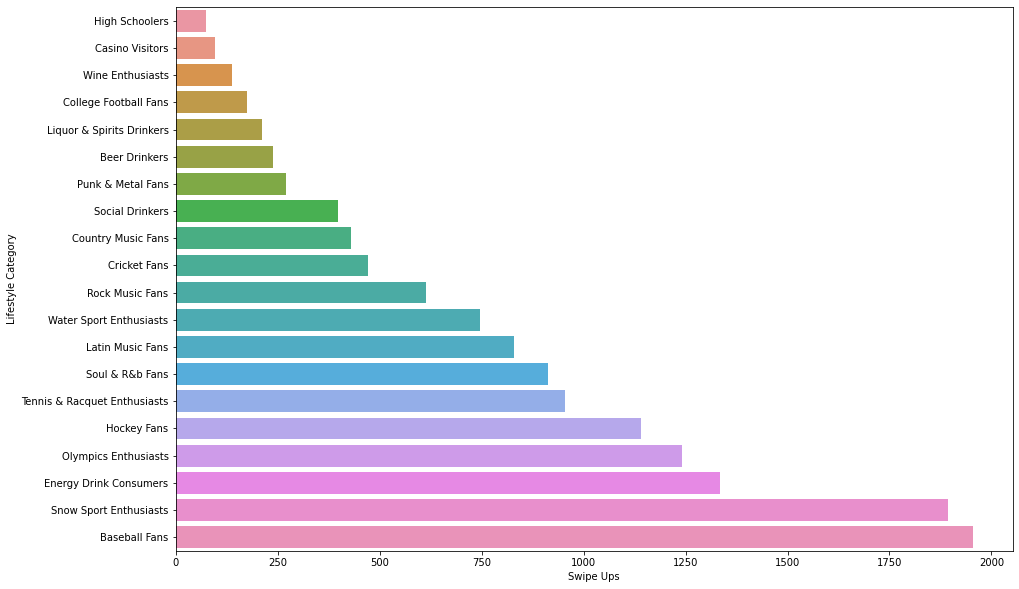

In [14]:
plt.figure(figsize=[15, 10])
sns.barplot(y=result['Lifestyle Category'][:20], x=result['Swipe Ups'][:20])
plt.show()

In [15]:
### Top 20 

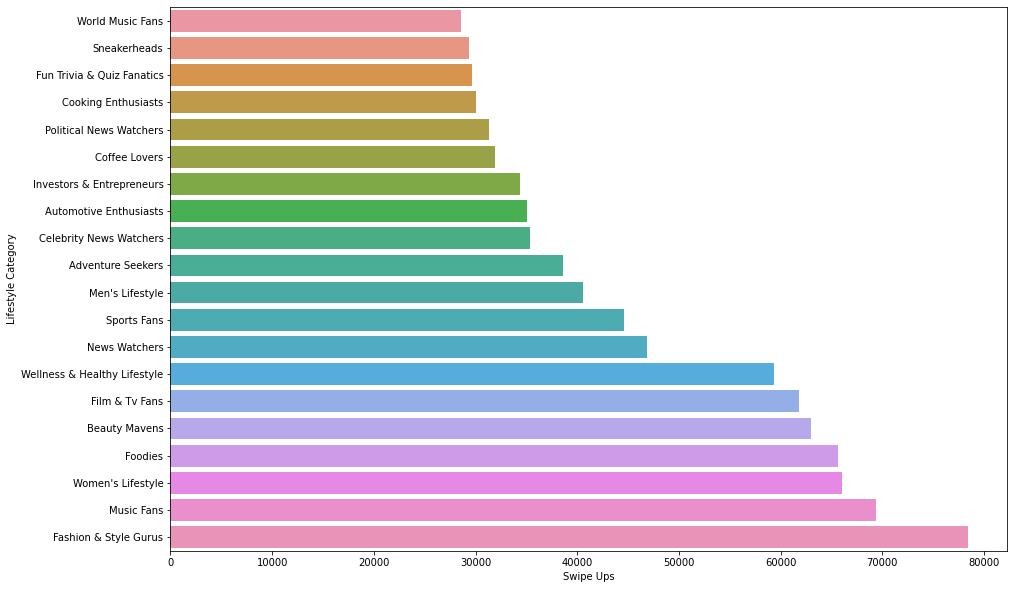

In [133]:
plt.figure(figsize=[15, 10])
sns.barplot(y=result['Lifestyle Category'][-20:], x=result['Swipe Ups'][-20:])
plt.show()

### 3) Campaign Name

In [17]:
## Getting Unique Values for Campaign Name
df['Campaign Name'].unique()

array(['Sobha - 3ayar - UAE', 'Binghatti - JVC', 'Aljurf - UAE - Native',
       'La Rosa - Dubai Prop', 'Pixel - UAE - Native',
       'Binghatti - Native', 'Binghati - KSA - Investors',
       'Sobha - UAE - Native', 'Aljurf - Jan - Native ', 'TG - Harmony 2',
       'Tilal alghaf - Ramadan', 'La Rosa - Targeted',
       'Falcon City Villas', 'Sobha - Static - UAE',
       'Waters Edge / Binghatti', 'Copy of Sobha - Jan - Native',
       'Binghatti JVC - Ramadan - UAE', 'Sobha - KSA - Investors'],
      dtype=object)

In [18]:
## Creating New column for country targeting of campaign
def region(value):
    if "KSA" in value:
        return "KSA"
    else:
        return "UAE"
    
df['Region'] = df['Campaign Name'].apply(region)

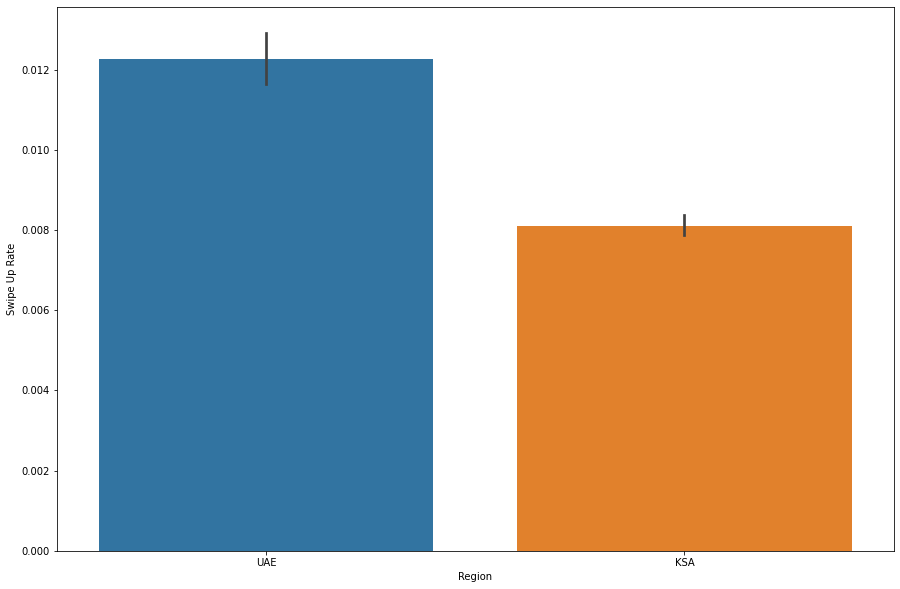

In [19]:
plt.figure(figsize=[15, 10])
sns.barplot(x=df['Region'], y=df['Swipe Up Rate'])
plt.show()

### 4) General Preprocessing

In [20]:
### Removing Rows that doesn't have values in numerical variables due to the system glitch 

In [21]:
## Following rows contain no information in Numerical columns
## The rows that contain zero value for Paid Impressions, Amount Spent and Paid eCPM contain no value, therefore they will be dropped
df[(df['Paid Impressions'] + df['Amount Spent'] + df['Paid eCPM'] + df['Swipe Ups']) == 0]

,Start Time,Lifestyle Category,Campaign Name,Paid Impressions,Amount Spent,Paid eCPM,Swipe Ups,eCPSU,Swipe Up Rate,Date,Region
9,2021-04-01 00:00:00 GST,High Schoolers,Sobha - 3ayar - UAE,0,0.0,0.0,0,0.0,0.0,2021-04-01,UAE
127,2021-04-02 00:00:00 GST,High Schoolers,Sobha - 3ayar - UAE,0,0.0,0.0,0,0.0,0.0,2021-04-02,UAE
245,2021-04-03 00:00:00 GST,High Schoolers,Sobha - 3ayar - UAE,0,0.0,0.0,0,0.0,0.0,2021-04-03,UAE
341,2021-04-03 00:00:00 GST,Casino Visitors,Sobha - 3ayar - UAE,0,0.0,0.0,0,0.0,0.0,2021-04-03,UAE
356,2021-04-05 00:00:00 GST,Social Drinkers,Sobha - 3ayar - UAE,0,0.0,0.0,0,0.0,0.0,2021-04-05,UAE
...,...,...,...,...,...,...,...,...,...,...,...
27172,2021-04-26 00:00:00 GST,Casino Visitors,Binghatti JVC - Ramadan - UAE,0,0.0,0.0,0,0.0,0.0,2021-04-26,UAE
27194,2021-04-27 00:00:00 GST,High Schoolers,Binghatti JVC - Ramadan - UAE,0,0.0,0.0,0,0.0,0.0,2021-04-27,UAE
27290,2021-04-27 00:00:00 GST,Casino Visitors,Binghatti JVC - Ramadan - UAE,0,0.0,0.0,0,0.0,0.0,2021-04-27,UAE
27312,2021-04-28 00:00:00 GST,High Schoolers,Binghatti JVC - Ramadan - UAE,0,0.0,0.0,0,0.0,0.0,2021-04-28,UAE


In [22]:
## Dropping Above rows
df.drop(df[(df['Paid Impressions'] + df['Amount Spent'] + df['Paid eCPM'] + df['Swipe Ups']) == 0].index, axis=0, inplace=True)

In [23]:
### Applying Label Encoder (Categorical Columns)


from sklearn.preprocessing import LabelEncoder

#### Label Encoder - Lifestyle Column

lb_lifestyle = LabelEncoder()
df['lifestyle_encoded'] = lb_lifestyle.fit_transform(df['Lifestyle Category'])

#### Label Encoder - Campaign Name

lb_campaign = LabelEncoder()
df['campaign_encoded'] = lb_campaign.fit_transform(df['Campaign Name'])

#### Label Encoder - Region

lb_region = LabelEncoder()
df['region_encoded'] = lb_region.fit_transform(df['Region'])

df.head()

,Start Time,Lifestyle Category,Campaign Name,Paid Impressions,Amount Spent,Paid eCPM,Swipe Ups,eCPSU,Swipe Up Rate,Date,Region,lifestyle_encoded,campaign_encoded,region_encoded
0,2021-04-01 00:00:00 GST,Women's Lifestyle,Sobha - 3ayar - UAE,14158,55.67,3.93,56,0.99,0.0040,2021-04-01,UAE,115,11,1
1,2021-04-01 00:00:00 GST,Automotive Shoppers,Sobha - 3ayar - UAE,16091,56.39,3.50,64,0.88,0.0040,2021-04-01,UAE,6,11,1
2,2021-04-01 00:00:00 GST,Social Drinkers,Sobha - 3ayar - UAE,97,0.25,2.55,1,0.25,0.0103,2021-04-01,UAE,97,11,1
3,2021-04-01 00:00:00 GST,Beer Drinkers,Sobha - 3ayar - UAE,39,0.15,3.89,0,0.00,0.0000,2021-04-01,UAE,11,11,1
4,2021-04-01 00:00:00 GST,Wine Enthusiasts,Sobha - 3ayar - UAE,17,0.05,2.85,0,0.00,0.0000,2021-04-01,UAE,114,11,1


In [24]:
#### Normalizing the Numerical columns

from sklearn.preprocessing import MinMaxScaler

## Extracting Numerical Columns
x = df[['Paid Impressions', 'Amount Spent', 'Paid eCPM', 'eCPSU', 'Swipe Up Rate', 'Swipe Ups' ]].values #returns an array with mumpy
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_numerical = pd.DataFrame(x_scaled)

In [25]:
## Replacing the original values in dataset with normalized values from the above temp df
df['Paid Impressions'] = df_numerical[0]
df['Amount Spent'] = df_numerical[1]
df['Paid eCPM'] = df_numerical[2]
df['eCPSU'] = df_numerical[3]
df['Swipe Up Rate'] = df_numerical[4]


In [29]:
df['Swipe Ups'] = df_numerical[5]


In [30]:
# Dropping Null Values resulted from normalization
df.drop(df[df['Paid Impressions'].isnull().values].index, axis=0, inplace=True)
df.drop(df[df['Amount Spent'].isnull().values].index, axis=0, inplace=True)
df.drop(df[df['Paid eCPM'].isnull().values].index, axis=0, inplace=True)
df.drop(df[df['Swipe Ups'].isnull().values].index, axis=0, inplace=True)
df.drop(df[df['eCPSU'].isnull().values].index, axis=0, inplace=True)
df.drop(df[df['Swipe Up Rate'].isnull().values].index, axis=0, inplace=True)


In [31]:
df.head()

,Start Time,Lifestyle Category,Campaign Name,Paid Impressions,Amount Spent,Paid eCPM,Swipe Ups,eCPSU,Swipe Up Rate,Date,Region,lifestyle_encoded,campaign_encoded,region_encoded,Swip Ups
0,2021-04-01 00:00:00 GST,Women's Lifestyle,Sobha - 3ayar - UAE,0.051223,0.066047,0.078131,0.035737,0.105544,0.0040,2021-04-01,UAE,115,11,1,0.035737
1,2021-04-01 00:00:00 GST,Automotive Shoppers,Sobha - 3ayar - UAE,0.058216,0.066902,0.069583,0.040842,0.093817,0.0040,2021-04-01,UAE,6,11,1,0.040842
2,2021-04-01 00:00:00 GST,Social Drinkers,Sobha - 3ayar - UAE,0.000351,0.000297,0.050696,0.000638,0.026652,0.0103,2021-04-01,UAE,97,11,1,0.000638
3,2021-04-01 00:00:00 GST,Beer Drinkers,Sobha - 3ayar - UAE,0.000141,0.000178,0.077336,0.000000,0.000000,0.0000,2021-04-01,UAE,11,11,1,0.000000
4,2021-04-01 00:00:00 GST,Wine Enthusiasts,Sobha - 3ayar - UAE,0.000062,0.000059,0.056660,0.000000,0.000000,0.0000,2021-04-01,UAE,114,11,1,0.000000


## Preparing Data for Modelling 


In [80]:
## Seperating independant varabiles (Features) an depandant variable  (Target Variable)
#X_main = df[['Paid Impressions', 'Amount Spent', 'lifestyle_encoded', 'campaign_encoded', 'region_encoded' ,'Paid eCPM', 'eCPSU', 'Swipe Up Rate' ]]
X_main = df[['Paid Impressions', 'Amount Spent' ,'Paid eCPM' , 'lifestyle_encoded', 'campaign_encoded', 'region_encoded' ]]
#X_main = df[['Paid Impressions', 'Amount Spent', 'lifestyle_encoded', 'campaign_encoded', 'region_encoded' ,'Paid eCPM' ]]


y_main = df[['Swipe Ups']]

X = X_main
y = y_main




In [81]:
from sklearn.model_selection import train_test_split

## Splitting the data into test and train with 25% as the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("Train Data Shape: ", X_train.shape, X_test.shape)
print("Test Data Shape: ", y_train.shape, y_test.shape)

Train Data Shape:  (21791, 6) (9339, 6)
Test Data Shape:  (21791, 1) (9339, 1)


In [82]:
# Checking the effect of this in compare to the shapes before hand.

print("Train Data Shape: ", X_train.shape, X_test.shape)
print("Test Data Shape: ", y_train.shape, y_test.shape)

Train Data Shape:  (21791, 6) (9339, 6)
Test Data Shape:  (21791, 1) (9339, 1)


# Modelling 


### Baseline

In [83]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.score(X_test, y_test)

-0.00014907394519170225

### Modeling 

#### Linear Regression Via Stats Models

In [84]:
import statsmodels.api as sm


In [85]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)



In [86]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Swipe Ups   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 4.715e+04
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        02:20:36   Log-Likelihood:                 60809.
No. Observations:               21791   AIC:                        -1.216e+05
Df Residuals:                   21784   BIC:                        -1.215e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0058      0.00

#### Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

clf_ridge = Ridge(alpha=1.0)

# training the model
clf_ridge.fit(X_train, y_train)

#results

print("Train score: ", clf_ridge.score(X_train, y_train))
print("Test score: ",clf_ridge.score(X_test, y_test))

Train score:  0.9279750856251843
Test score:  0.9253900427904115


In [88]:

from sklearn.linear_model import Ridge

clf_ridge = Ridge(alpha=1.0)

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model



scoring = ['neg_mean_absolute_error', 'r2']
for score in scoring:
    scores = cross_val_score(clf_ridge, X, y, scoring=score, cv=cv, n_jobs=-1)
    if score == "neg_mean_absolute_error":
        scores = absolute(scores)
        print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    else:
        print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))



Mean MAE: 0.008 (0.000)
R2: 0.927 (0.003)


###  Support Vector Regression

In [90]:
from sklearn.svm import SVR

clf_svr2 = SVR()

# training the model
clf_svr2.fit(X_train, y_train)

#results

print("Train score: ", clf_svr2.score(X_train, y_train))
print("Test score: ", clf_svr2.score(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train score:  -1.1568621481541523
Test score:  -1.317463641385062


In [89]:

clf_svr = SVR()

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scoring = ['neg_mean_absolute_error', 'r2']
for score in scoring:
    scores = cross_val_score(clf_svr, X_train, y_train, scoring=score, cv=cv, n_jobs=-1)
    if score == "neg_mean_absolute_error":
        scores = absolute(scores)
        print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    else:
        print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.074 (0.001)
R2: -1.166 (0.088)


#### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

# training the model
dtr.fit(X_train, y_train)

#results

print("Train score: ", dtr.score(X_train, y_train))
print("Test score: ",dtr.score(X_test, y_test))

Train score:  1.0
Test score:  0.9049279777935209


In [134]:
# Decision Tree with cross Validation 

dtr = DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model



scoring = ['neg_mean_absolute_error', 'r2']
for score in scoring:
    scores = cross_val_score(dtr, X, y, scoring=score, cv=cv, n_jobs=-1)
    if score == "neg_mean_absolute_error":
        scores = absolute(scores)
        print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    else:
        print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 0.008 (0.000)
R2: 0.917 (0.006)


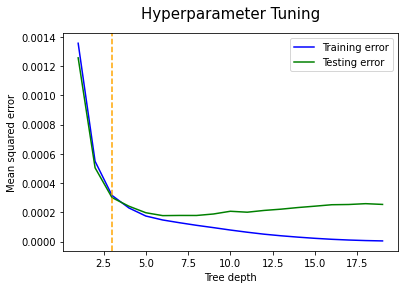

In [114]:
#Decision Tree Tuning
from sklearn.metrics import mean_squared_error

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mean_squared_error(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mean_squared_error(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=3, color='orange', linestyle='--')
plt.annotate('optimum = 3', xy=(3.2, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

In [113]:
# Rerun with tuning max depth

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)

# training the model
dtr.fit(X_train, y_train)

#results

print("Train score: ", dtr.score(X_train, y_train))
print("Test score: ",dtr.score(X_test, y_test))

Train score:  0.8948844046479922
Test score:  0.8921206042928919


In [135]:
# Decision Tree with cross Validation and Max Depth 

dtr = DecisionTreeRegressor(max_depth=3)

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model



scoring = ['neg_mean_absolute_error', 'r2']
for score in scoring:
    scores = cross_val_score(dtr, X, y, scoring=score, cv=cv, n_jobs=-1)
    if score == "neg_mean_absolute_error":
        scores = absolute(scores)
        print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    else:
        print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 0.010 (0.000)
R2: 0.892 (0.008)


#### Random Forest Regression

In [92]:
from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor()

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

print("Train score:   ", clf_rf.score(X_train,y_train))
print("Test score:   ", clf_rf.score(X_test,y_test))

<ipython-input-92-3e71746afdc1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train, y_train)


Train score:    0.9937744146417065
Test score:    0.9486830736922591


In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean
from numpy import std


clf_rf = RandomForestRegressor()

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)


# evaluate model


scoring = ['neg_mean_absolute_error', 'r2']
for score in scoring:
    scores = cross_val_score(clf_rf, X_train, y_train, scoring=score, cv=cv, n_jobs=-1)
    if score == "neg_mean_absolute_error":
        scores = absolute(scores)
        print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    else:
        print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))



Mean MAE: 0.006 (0.000)
R2: 0.954 (0.004)


## Optimizing with GridsearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf_gscv = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gscv, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [96]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [100]:
#Re Running Random Forest using Grid Results

from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor(
 max_depth= 80,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators= 300)

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

print("Train score:   ", clf_rf.score(X_train,y_train))
print("Test score:   ", clf_rf.score(X_test,y_test))

<ipython-input-100-d0327e59a106>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train, y_train)


Train score:    0.9790642036386032
Test score:    0.9505933916808247


In [123]:
# Rerunning Random forest using Grid Results Plus Cross Val Plus Negative mean scoring 



clf_rf = RandomForestRegressor(
 max_depth= 80,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators= 300)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)


# evaluate model


scoring = ['neg_mean_absolute_error', 'r2']
for score in scoring:
    scores = cross_val_score(clf_rf, X_train, y_train, scoring=score, cv=cv, n_jobs=-1)
    if score == "neg_mean_absolute_error":
        scores = absolute(scores)
        print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    else:
        print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 0.006 (0.000)
R2: 0.954 (0.004)


In [126]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 3.1 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
